In [ ]:
from google.colab import drive;
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bookings_03_11.csv', low_memory=False).drop(columns='Unnamed: 0')
df['date_book'] = pd.to_datetime(df['date_book']); df

,id_object,date_book,room_type_agg,rooms,amount,prepay,guests,nights,price_per_night,target,...,Td_mean,Td_min,Td_max,Td_sd,click_search,click_ad,direct_visit,click_socnet,click_link,total_traffic
0,1,2019-01-01,Апартаменты,1.0,26600.000000,0.000000,1.000000,2.000000,13300.000000,1,...,-3.6500,-8.3,1.1,2.839517,4778,0,1017,81,294,6501
1,1,2019-01-01,Коттедж,1.0,59400.000000,59400.000000,1.000000,1.000000,59400.000000,1,...,-3.6500,-8.3,1.1,2.839517,4778,0,1017,81,294,6501
2,1,2019-01-01,Стандарт,1.5,13000.000000,7300.000000,2.000000,1.000000,10150.000000,2,...,-3.6500,-8.3,1.1,2.839517,4778,0,1017,81,294,6501
3,1,2019-01-02,Коттедж,1.0,47900.000000,47900.000000,1.000000,2.000000,23950.000000,1,...,-1.3625,-4.5,-0.1,1.678381,6407,0,1412,146,466,9018
4,1,2019-01-02,Стандарт,1.0,14683.181818,13201.363636,1.818182,1.454545,9277.575455,11,...,-1.3625,-4.5,-0.1,1.678381,6407,0,1412,146,466,9018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19710,6,2024-10-28,Студия,1.0,21375.000000,21375.000000,1.000000,1.500000,14012.500000,2,...,-3.6500,-6.3,-1.8,1.683534,1100,532,439,21,163,2455
19711,6,2024-10-29,Стандарт,1.0,8975.000000,4575.250000,1.500000,1.000000,8975.000000,4,...,-4.2500,-5.5,-3.2,0.814160,1040,805,390,26,160,2577
19712,6,2024-10-29,Студия,1.0,22525.000000,17358.333333,1.666667,2.000000,11775.000000,3,...,-4.2500,-5.5,-3.2,0.814160,1040,805,390,26,160,2577
19713,6,2024-10-30,Стандарт,1.0,25445.000000,9393.727273,1.363636,1.636364,13948.181818,11,...,-3.4125,-5.1,-1.8,1.085538,925,853,366,34,158,2466


# Прогноз по отелям

In [ ]:
df = df[['id_object', 'date_book', 'room_type_agg', 'target', 'working_day',
       'week_trend',
        #  'monday',
         'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'sunday', 'month_trend', 'year_trend',
        #  'jan',
         'feb', 'mar',
       'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'T_mean',
       'T_min', 'T_max', 'T_sd', 'U_mean', 'U_min', 'U_max', 'U_sd', 'Ff_mean',
       'Ff_min', 'Ff_max', 'Ff_sd', 'N_mean', 'N_min', 'N_max', 'N_sd',
       'Nh_mean', 'Nh_min', 'Nh_max', 'Nh_sd', 'H_mean', 'H_min', 'H_max',
       'H_sd', 'VV_mean', 'VV_min', 'VV_max', 'VV_sd', 'Td_mean', 'Td_min',
       'Td_max', 'Td_sd'
       ]]

agg_df = df.groupby(['id_object', 'date_book']).agg({'target': 'sum'}).reset_index().merge(df[['id_object', 'date_book', 'working_day',
       'week_trend',
        # 'monday',
          'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'sunday', 'month_trend', 'year_trend',
        #  'jan',
         'feb', 'mar',
       'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'T_mean',
       'T_min', 'T_max', 'T_sd', 'U_mean', 'U_min', 'U_max', 'U_sd', 'Ff_mean',
       'Ff_min', 'Ff_max', 'Ff_sd', 'N_mean', 'N_min', 'N_max', 'N_sd',
       'Nh_mean', 'Nh_min', 'Nh_max', 'Nh_sd', 'H_mean', 'H_min', 'H_max',
       'H_sd', 'VV_mean', 'VV_min', 'VV_max', 'VV_sd', 'Td_mean', 'Td_min',
       'Td_max', 'Td_sd']].drop_duplicates(), on=['id_object', 'date_book'], how = 'left')

agg_df.rename(columns={'date_book': 'ds', 'target': 'y'}, inplace=True)

In [ ]:
df_catboost = agg_df.copy()
df_catboost['Lag_1'] = df_catboost.groupby('id_object')['y'].shift(1)
df_catboost['Lag_7'] = df_catboost.groupby('id_object')['y'].shift(7)
df_catboost['Lag_30'] = df_catboost.groupby('id_object')['y'].shift(30)
df_catboost['Lag_365'] = df_catboost.groupby('id_object')['y'].shift(365)

df_catboost.set_index('ds', inplace=True)
df_catboost

,id_object,y,working_day,week_trend,tuesday,wednesday,thursday,friday,saturday,sunday,...,VV_max,VV_sd,Td_mean,Td_min,Td_max,Td_sd,Lag_1,Lag_7,Lag_30,Lag_365
ds,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1,4,0,1,1,0,0,0,0,0,...,50.0,18.976960,-3.6500,-8.3,1.1,2.839517,NaN,NaN,NaN,NaN
2019-01-02,1,12,0,2,0,1,0,0,0,0,...,50.0,21.536928,-1.3625,-4.5,-0.1,1.678381,4.0,NaN,NaN,NaN
2019-01-03,1,21,0,3,0,0,1,0,0,0,...,50.0,16.928421,-6.5125,-11.1,-4.7,1.990289,12.0,NaN,NaN,NaN
2019-01-04,1,13,0,4,0,0,0,1,0,0,...,50.0,20.887454,-9.8625,-12.3,-8.0,1.779195,21.0,NaN,NaN,NaN
2019-01-05,1,16,0,5,0,0,0,0,1,0,...,50.0,17.120894,-7.3500,-8.7,-5.8,1.155113,13.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-26,6,5,0,5,0,0,0,0,1,0,...,50.0,14.142136,-4.9375,-7.2,-3.3,1.264840,9.0,4.0,11.0,9.0
2024-10-27,6,6,0,6,0,0,0,0,0,1,...,50.0,0.000000,-6.9500,-8.3,-6.0,0.680336,5.0,10.0,8.0,13.0
2024-10-28,6,6,1,0,0,0,0,0,0,0,...,50.0,23.789253,-3.6500,-6.3,-1.8,1.683534,6.0,13.0,10.0,17.0


In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(0)

df_catboost['id_object'] = df_catboost['id_object'].astype('category')

X = df_catboost.drop('y', axis=1)
y = df_catboost['y']

test_start_date = '2024-07-29'

X_train = X[X.index < test_start_date]
y_train = y[y.index < test_start_date]
X_test = X[X.index >= test_start_date]
y_test = y[y.index >= test_start_date]

model = CatBoostRegressor(iterations=100, learning_rate=0.01, depth=10, cat_features=['id_object'], verbose=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)**0.5
print(f'Mean Absolute Error: {rmse:.2f}')

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results['id_object'] = X_test['id_object'].values
results['ds'] = X_test.index
print(results)


0:	learn: 7.8994614	total: 169ms	remaining: 16.7s
99:	learn: 5.6673253	total: 8.75s	remaining: 0us
Mean Absolute Error: 4.85
            Actual  Predicted id_object         ds
ds                                                
2024-07-29      28  15.947649         1 2024-07-29
2024-07-30      20  18.829492         1 2024-07-30
2024-07-31      46  15.580836         1 2024-07-31
2024-08-01      21  17.812887         1 2024-08-01
2024-08-02      22  16.138298         1 2024-08-02
...            ...        ...       ...        ...
2024-10-26       5   8.996417         6 2024-10-26
2024-10-27       6   9.467108         6 2024-10-27
2024-10-28       6  10.973379         6 2024-10-28
2024-10-29       7  10.822867         6 2024-10-29
2024-10-30      13   9.866524         6 2024-10-30

[558 rows x 4 columns]


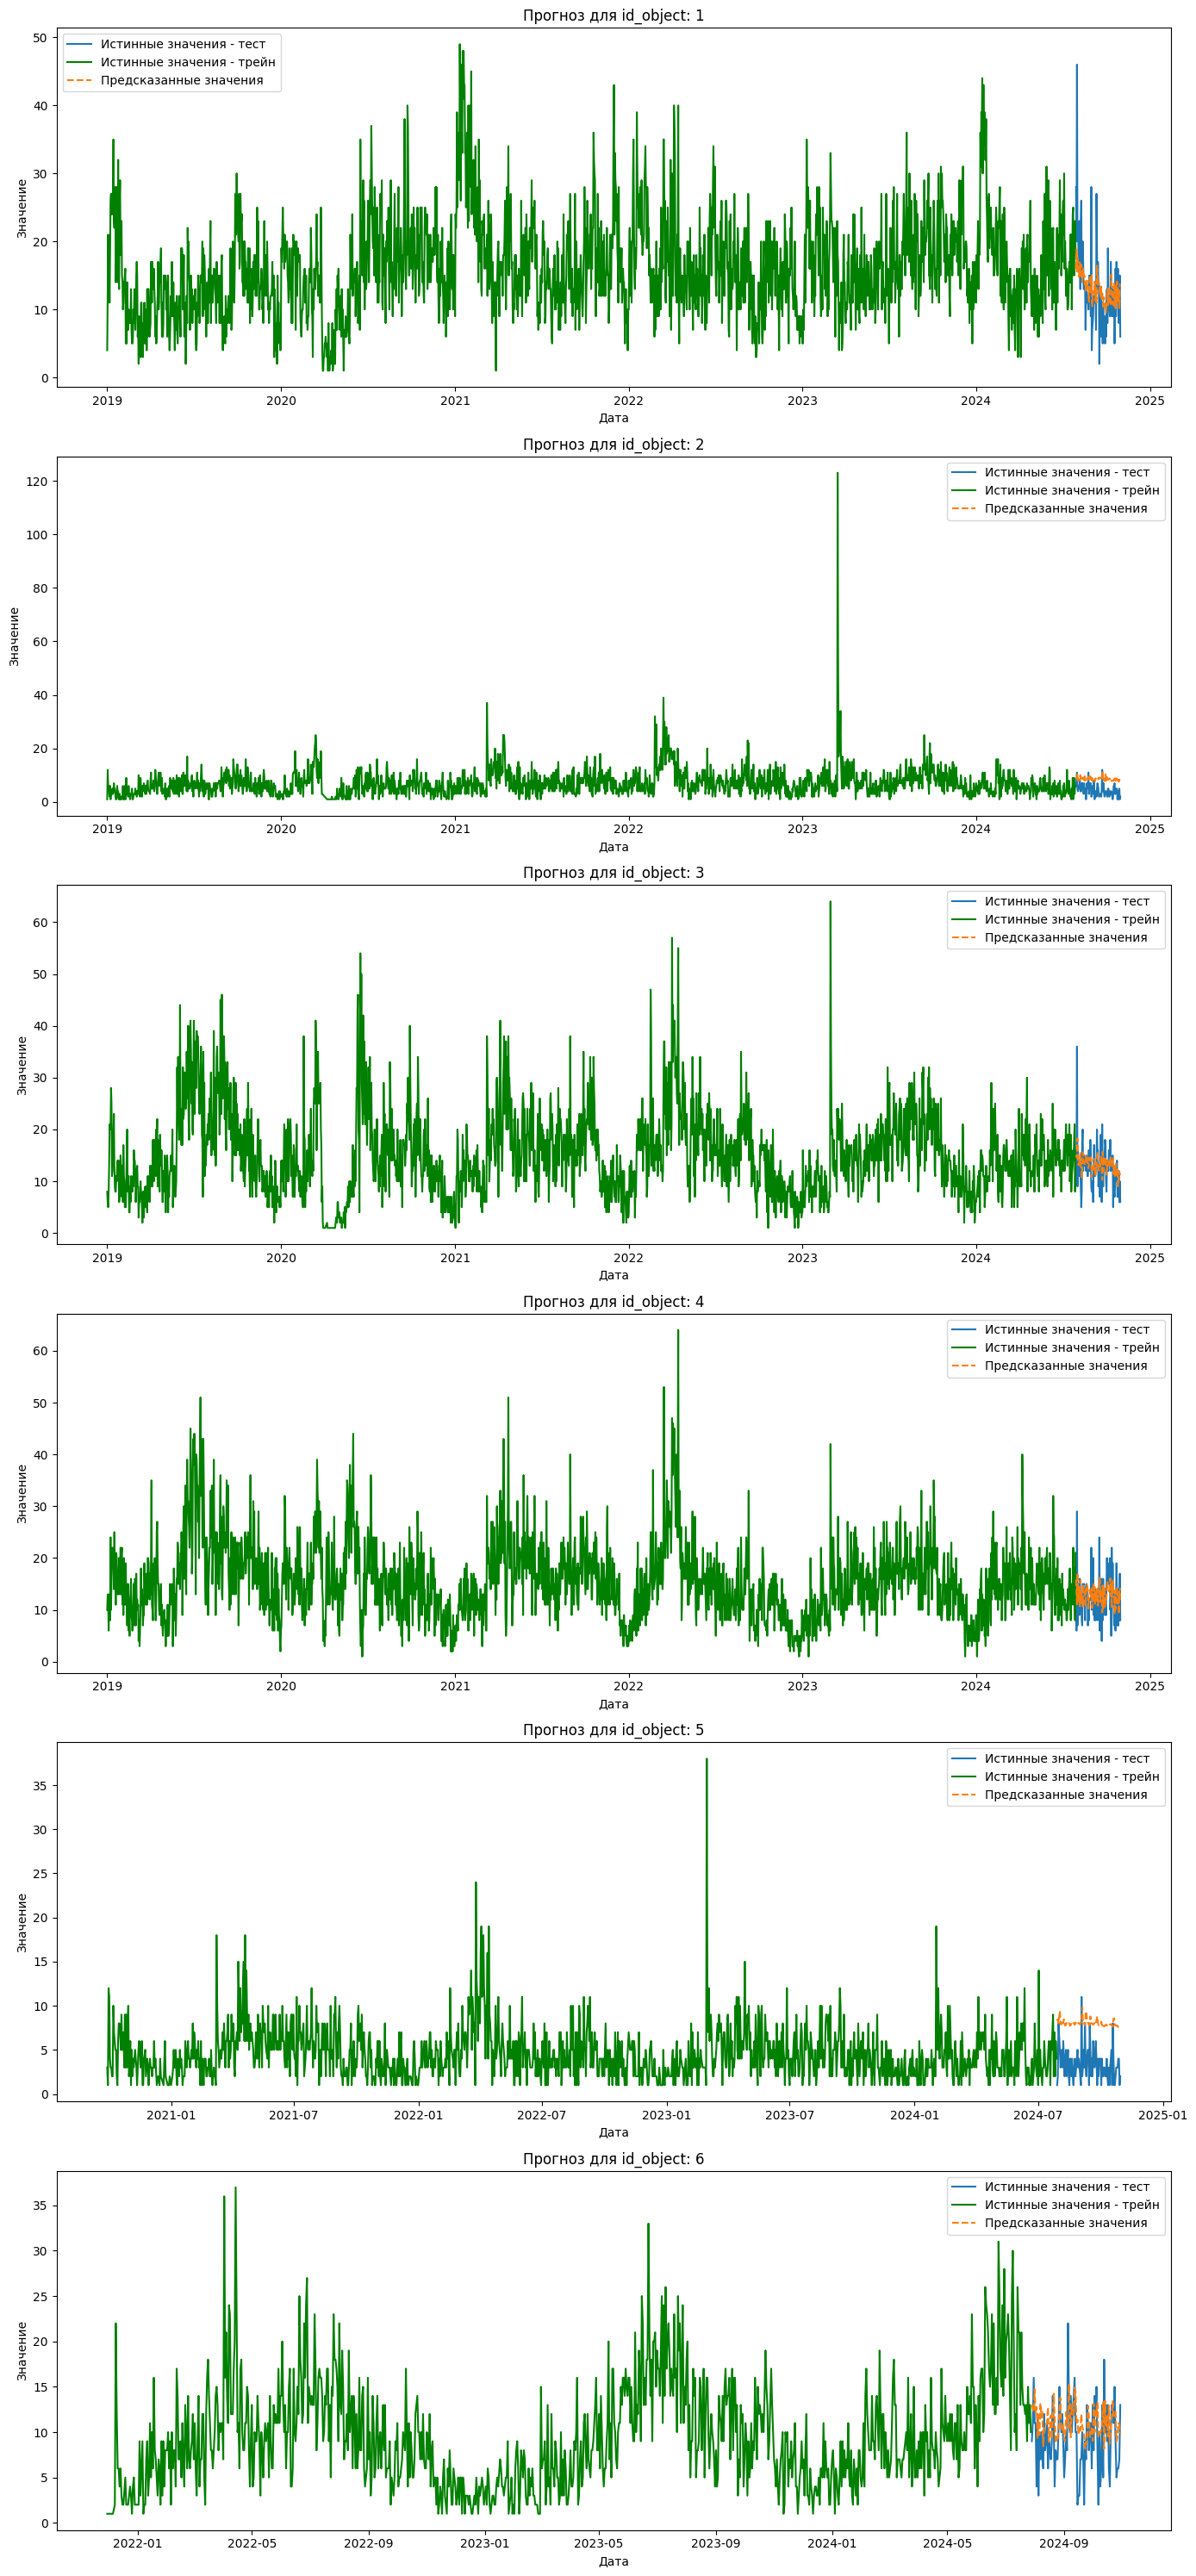

In [ ]:
unique_id_objects = agg_df['id_object'].unique()
num_id_objects = len(unique_id_objects)
fig, axes = plt.subplots(num_id_objects, 1, figsize=(14, 5 * num_id_objects))

for ax, id_object in zip(axes, unique_id_objects):
    group_test = df_catboost[(df_catboost.index >= '2024-07-29') & (df_catboost['id_object'] == id_object)]
    ax.plot(group_test.index, group_test['y'], label='Истинные значения - тест')

    group_train = df_catboost[(df_catboost.index < '2024-07-29') & (df_catboost['id_object'] == id_object)]
    ax.plot(group_train.index, group_train['y'], label='Истинные значения - трейн', color = 'green')

    group_forecast = results[results['id_object'] == id_object]
    ax.plot(group_forecast.index, group_forecast['Predicted'], label='Предсказанные значения', linestyle='--')

    ax.set_title(f'Прогноз для id_object: {id_object}')
    ax.set_xlabel('Дата')
    ax.set_ylabel('Значение')
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
results.to_excel('catboost_2.xlsx', index = False)

In [ ]:
final_forecast.merge(test_df[['id_object', 'ds', 'y']], on = ['id_object', 'ds']).to_excel('profet.xlsx', index = False)

In [ ]:
rmse = mean_squared_error(results['Actual'], results['Predicted'])** 0.5

print(f'RMSE: {rmse:.2f}')

RMSE: 5.42


In [ ]:
for id_object in df['id_object'].unique():
  y_pred = results[results['id_object'] == id_object]['Predicted'].values
  y_true = results[results['id_object'] == id_object]['Actual'].values

  rmse = mean_squared_error(y_true, y_pred) ** 0.5
  print(str(id_object) + " ------ " + str(rmse))

1 ------ 7.369445440409429
2 ------ 4.502513954162762
3 ------ 6.278915146440269
4 ------ 6.09926017897665
5 ------ 2.4268318259696966
6 ------ 4.222154765102878


In [ ]:
y_true = results['Actual']
y_pred = results['Predicted']

mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'MAPE: {mape:.2f}%')

MAPE: 76.99%


In [ ]:
for id_object in df['id_object'].unique():
  y_pred = results[results['id_object'] == id_object]['Predicted'].values
  y_true = results[results['id_object'] == id_object]['Actual'].values

  mape = np.mean(np.abs((y_true - y_pred) / y_true))
  print(str(id_object) + " ------ " + str(mape))

1 ------ 0.650867085124435
2 ------ 1.443231084708758
3 ------ 0.507624961453573
4 ------ 0.5302936413992393
5 ------ 0.9566716004209194
6 ------ 0.5529218101087793


In [ ]:
feature_importances = model.get_feature_importance()

feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

        Feature  Importance
56        Lag_7   18.425947
0     id_object   10.476216
58      Lag_365    7.193979
57       Lag_30    5.442924
10  month_trend    3.557432
11   year_trend    2.468668
28       U_mean    2.314474
32      Ff_mean    2.061419
55        Td_sd    2.025383
25        T_min    1.988237
31         U_sd    1.913682
47         H_sd    1.907152
40      Nh_mean    1.869225
36       N_mean    1.784820
14          mar    1.776188
54       Td_max    1.764613
35        Ff_sd    1.752555
27         T_sd    1.746303
1   working_day    1.737920
26        T_max    1.715886
30        U_max    1.694879
51        VV_sd    1.618842
24       T_mean    1.597544
48      VV_mean    1.462089
52      Td_mean    1.450203
53       Td_min    1.408448
44       H_mean    1.387289
15          apr    1.376233
29        U_min    1.375487
39         N_sd    1.357492
43        Nh_sd    1.220400
2    week_trend    1.199361
23          dec    1.003827
49       VV_min    0.771199
16          may    0

In [ ]:
agg_prediction

,ds,Actual,Predicted,id_object
0,2024-07-29,28,17.409142,1
1,2024-07-30,20,21.853509,1
2,2024-07-31,46,13.503700,1
3,2024-08-01,21,17.194468,1
4,2024-08-02,22,18.725259,1
...,...,...,...,...
553,2024-10-26,5,6.211445,6
554,2024-10-27,6,9.479684,6
555,2024-10-28,6,10.558732,6
556,2024-10-29,7,13.213919,6


In [ ]:
agg_prediction = results.reset_index()

def calculate_rolling_sums(df, group_cols, target_col, window):
    df = df.set_index('ds')

    rolling_result = (
        df.groupby(group_cols)[target_col]
        .rolling(window=window)
        .agg(['sum'])
        .reset_index()
    )

    rolling_result.rename(columns={'sum': f'{window}_Day_Sum_{target_col}'}, inplace=True)
    df = df.merge(rolling_result, on= group_cols + ['ds'], how='left')
    return df


agg_prediction = calculate_rolling_sums(agg_prediction, ['id_object'], 'Actual', 7)
agg_prediction = calculate_rolling_sums(agg_prediction, ['id_object'], 'Predicted', 7)

agg_prediction = calculate_rolling_sums(agg_prediction, ['id_object'], 'Actual', 14)
agg_prediction = calculate_rolling_sums(agg_prediction, ['id_object'], 'Predicted', 14)

agg_prediction = calculate_rolling_sums(agg_prediction, ['id_object'], 'Actual', 30)
agg_prediction = calculate_rolling_sums(agg_prediction, ['id_object'], 'Predicted', 30)

agg_prediction['Index'] = agg_prediction.groupby(['id_object']).cumcount() + 1


agg_prediction['Label_7'] = np.where(agg_prediction['Index'] % 7 == 0, 1, np.NaN)
agg_prediction['Label_14'] = np.where(agg_prediction['Index'] % 14 == 0, 1, np.NaN)
agg_prediction['Label_30'] = np.where(agg_prediction['Index'] % 30 == 0, 1, np.NaN)

agg_prediction.set_index('ds', inplace=True)

<ipython-input-120-96dbb4e93c81>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_cols)[target_col]
<ipython-input-120-96dbb4e93c81>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_cols)[target_col]
<ipython-input-120-96dbb4e93c81>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_cols)[target_col]
<ipython-input-120-96dbb4e93c81>:8: FutureWarning: The default of observe

In [ ]:
for id_object in agg_prediction['id_object'].unique():

  seven_days_true = agg_prediction[(agg_prediction['id_object'] == id_object) & (agg_prediction['Label_7'] == 1)]['7_Day_Sum_Actual']
  seven_days_pred = agg_prediction[(agg_prediction['id_object'] == id_object) & (agg_prediction['Label_7'] == 1)]['7_Day_Sum_Predicted']

  fourteen_days_true = agg_prediction[(agg_prediction['id_object'] == id_object) & (agg_prediction['Label_14'] == 1)]['14_Day_Sum_Actual']
  fourteen_days_pred = agg_prediction[(agg_prediction['id_object'] == id_object) & (agg_prediction['Label_14'] == 1)]['14_Day_Sum_Predicted']

  thirty_days_true = agg_prediction[(agg_prediction['id_object'] == id_object) & (agg_prediction['Label_30'] == 1)]['30_Day_Sum_Actual']
  thirty_days_pred = agg_prediction[(agg_prediction['id_object'] == id_object) & (agg_prediction['Label_30'] == 1)]['30_Day_Sum_Predicted']

  mape_7 = np.mean(np.abs((seven_days_true - seven_days_pred) / seven_days_true))
  mape_14 = np.mean(np.abs((fourteen_days_true - fourteen_days_pred) / fourteen_days_true))
  mape_30 = np.mean(np.abs((thirty_days_true - thirty_days_pred) / thirty_days_true))

  rmse_7 = mean_squared_error(seven_days_true, seven_days_pred)** 0.5
  rmse_14 = mean_squared_error(fourteen_days_true, fourteen_days_pred)** 0.5
  rmse_30 = mean_squared_error(thirty_days_true, thirty_days_pred)** 0.5


  print(str(id_object) + " ------ mape 7: " + str(mape_7) + " ------ mape 14: " + str(mape_14) + " ------ mape 30: " + str(mape_30) +\
        " ------ rmse 7: " + str(rmse_7) + " ------ rmse 14: " + str(rmse_14) + " ------ rmse 30: " + str(rmse_30))

1 ------ mape 7: 0.4324876705717209 ------ mape 14: 0.4196126983082024 ------ mape 30: 0.3143180660744018 ------ rmse 7: 37.6387783566332 ------ rmse 14: 71.07916617663068 ------ rmse 30: 125.09885916812499
2 ------ mape 7: 0.8534398968622487 ------ mape 14: 0.7591929930665139 ------ mape 30: 0.7891201503943881 ------ rmse 7: 25.94464764214585 ------ rmse 14: 49.4509878715839 ------ rmse 30: 104.18592675735086
3 ------ mape 7: 0.3431204001824341 ------ mape 14: 0.3235912353385343 ------ mape 30: 0.32526511301430755 ------ rmse 7: 31.969781702830844 ------ rmse 14: 59.91510611663573 ------ rmse 30: 127.07144050711864
4 ------ mape 7: 0.3121993210210621 ------ mape 14: 0.30927271667098716 ------ mape 30: 0.3049790731816466 ------ rmse 7: 27.63780236268545 ------ rmse 14: 54.42211931818457 ------ rmse 30: 114.59950178317563
5 ------ mape 7: 0.35892618954152705 ------ mape 14: 0.35633149849978535 ------ mape 30: 0.3562733098781081 ------ rmse 7: 8.880449086011636 ------ rmse 14: 17.4874112

# Прогноз в разрезе отель - тип номера

In [ ]:
df_catboost_room = df.copy()
df_catboost_room['Lag_7'] = df_catboost_room.groupby(['id_object', 'room_type_agg'])['target'].shift(7)
df_catboost_room['Lag_30'] = df_catboost_room.groupby(['id_object', 'room_type_agg'])['target'].shift(30)
df_catboost_room['Lag_365'] = df_catboost_room.groupby(['id_object', 'room_type_agg'])['target'].shift(365)
df_catboost_room.set_index('date_book', inplace=True)
df_catboost_room

,id_object,room_type_agg,target,working_day,week_trend,monday,tuesday,wednesday,thursday,friday,...,VV_min,VV_max,VV_sd,Td_mean,Td_min,Td_max,Td_sd,Lag_7,Lag_30,Lag_365
date_book,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1,Апартаменты,1,0,1,0,1,0,0,0,...,4.0,50.0,18.976960,-3.6500,-8.3,1.1,2.839517,NaN,NaN,NaN
2019-01-01,1,Коттедж,1,0,1,0,1,0,0,0,...,4.0,50.0,18.976960,-3.6500,-8.3,1.1,2.839517,NaN,NaN,NaN
2019-01-01,1,Стандарт,2,0,1,0,1,0,0,0,...,4.0,50.0,18.976960,-3.6500,-8.3,1.1,2.839517,NaN,NaN,NaN
2019-01-02,1,Коттедж,1,0,2,0,0,1,0,0,...,2.0,50.0,21.536928,-1.3625,-4.5,-0.1,1.678381,NaN,NaN,NaN
2019-01-02,1,Стандарт,11,0,2,0,0,1,0,0,...,2.0,50.0,21.536928,-1.3625,-4.5,-0.1,1.678381,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-28,6,Студия,2,1,0,1,0,0,0,0,...,5.0,50.0,23.789253,-3.6500,-6.3,-1.8,1.683534,4.0,5.0,6.0
2024-10-29,6,Стандарт,4,1,1,0,1,0,0,0,...,50.0,50.0,0.000000,-4.2500,-5.5,-3.2,0.814160,5.0,9.0,7.0
2024-10-29,6,Студия,3,1,1,0,1,0,0,0,...,50.0,50.0,0.000000,-4.2500,-5.5,-3.2,0.814160,7.0,2.0,4.0


In [ ]:
np.random.seed(0)

df_catboost_room['id_object'] = df_catboost_room['id_object'].astype('category')
df_catboost_room['room_type_agg'] = df_catboost_room['room_type_agg'].astype('category')

X = df_catboost_room.drop('target', axis=1)
y = df_catboost_room['target']

test_start_date = '2024-07-29'

X_train = X[X.index < test_start_date]
y_train = y[y.index < test_start_date]
X_test = X[X.index >= test_start_date]
y_test = y[y.index >= test_start_date]

model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, cat_features=['id_object', 'room_type_agg'], verbose=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results['id_object'] = X_test['id_object'].values
results['room_type_agg'] = X_test['room_type_agg'].values
print(results)

0:	learn: 5.6235793	total: 27.7ms	remaining: 27.6s
100:	learn: 3.4992753	total: 1.74s	remaining: 15.5s
200:	learn: 3.2833423	total: 3.44s	remaining: 13.7s
300:	learn: 3.0965979	total: 5.21s	remaining: 12.1s
400:	learn: 2.9534745	total: 7.9s	remaining: 11.8s
500:	learn: 2.8273858	total: 10.6s	remaining: 10.6s
600:	learn: 2.7241724	total: 12.4s	remaining: 8.23s
700:	learn: 2.6340774	total: 14.1s	remaining: 6.03s
800:	learn: 2.5514854	total: 15.9s	remaining: 3.95s
900:	learn: 2.4737047	total: 17.7s	remaining: 1.94s
999:	learn: 2.3982957	total: 19.4s	remaining: 0us
Mean Absolute Error: 2.67
            Actual  Predicted id_object room_type_agg
date_book                                            
2024-07-29       6   4.342599         1   Апартаменты
2024-07-29       5   3.294056         1       Коттедж
2024-07-29      17  10.646234         1      Стандарт
2024-07-30       9   4.938105         1   Апартаменты
2024-07-30       1   5.317916         1       Коттедж
...            ...        ..

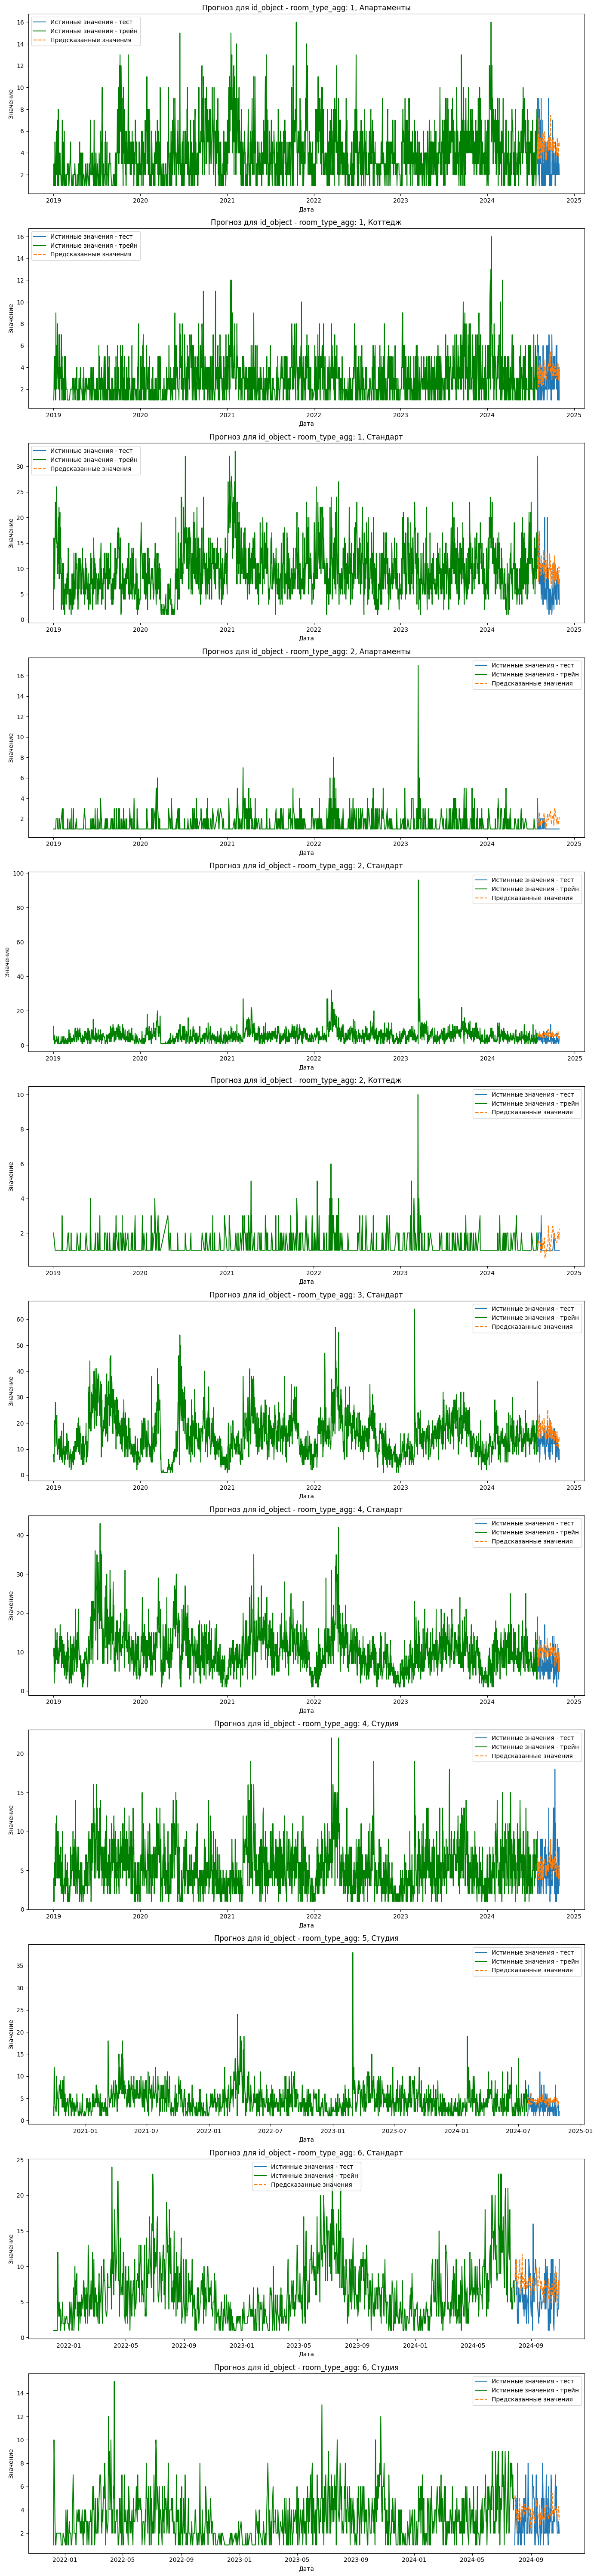

In [ ]:
unique_id_objects = df_catboost_room[['id_object', 'room_type_agg']].drop_duplicates()
num_id_objects = len(unique_id_objects)

fig, axes = plt.subplots(num_id_objects, 1, figsize=(14, 5 * num_id_objects))

for ax, (index, row) in zip(axes, unique_id_objects.iterrows()):
    id_object = row['id_object']
    room_type_agg = row['room_type_agg']

    group_test = df_catboost_room[(df_catboost_room.index >= '2024-07-29') & (df_catboost_room['id_object'] == id_object) & (df_catboost_room['room_type_agg'] == room_type_agg)]
    ax.plot(group_test.index, group_test['target'], label='Истинные значения - тест')

    group_train = df_catboost_room[(df_catboost_room.index < '2024-07-29') & (df_catboost_room['id_object'] == id_object) & (df_catboost_room['room_type_agg'] == room_type_agg)]
    ax.plot(group_train.index, group_train['target'], label='Истинные значения - трейн', color = 'green')

    group_forecast = results[(results['id_object'] == id_object) & (results['room_type_agg'] == room_type_agg)]
    ax.plot(group_forecast.index, group_forecast['Predicted'], label='Предсказанные значения', linestyle='--')

    ax.set_title(f'Прогноз для id_object - room_type_agg: {id_object}, {room_type_agg}')
    ax.set_xlabel('Дата')
    ax.set_ylabel('Значение')
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
rmse = mean_squared_error(results['Actual'], results['Predicted'])** 0.5

print(f'RMSE: {rmse:.2f}')

RMSE: 3.56


In [ ]:
for index, row in results[['id_object', 'room_type_agg']].drop_duplicates().iterrows():
  id_object = row['id_object']
  room_type_agg = row['room_type_agg']
  y_true = results[(results['id_object'] == id_object) & (results['room_type_agg'] == room_type_agg)]['Actual'].values
  y_pred = results[(results['id_object'] == id_object) & (results['room_type_agg'] == room_type_agg)]['Predicted'].values

  rmse = mean_squared_error(y_true, y_pred)** 0.5
  print(str(id_object) + "--- " + str(room_type_agg) + " ------ " + str(rmse))

1--- Апартаменты ------ 2.56184719301243
1--- Коттедж ------ 1.9316689415438744
1--- Стандарт ------ 5.47610757193131
2--- Апартаменты ------ 0.9853077769329617
2--- Коттедж ------ 0.7752601923148763
2--- Стандарт ------ 3.121484545991834
3--- Стандарт ------ 5.968131927457542
4--- Стандарт ------ 4.355764076399425
4--- Студия ------ 3.0736189042398885
5--- Студия ------ 2.228788022840261
6--- Стандарт ------ 3.336777167654442
6--- Студия ------ 1.963599002818598


In [ ]:
y_true = results['Actual']
y_pred = results['Predicted']
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'MAPE: {mape:.2f}%')

MAPE: 87.02%


In [ ]:
for index, row in results[['id_object', 'room_type_agg']].drop_duplicates().iterrows():
  id_object = row['id_object']
  room_type_agg = row['room_type_agg']
  y_true = results[(results['id_object'] == id_object) & (results['room_type_agg'] == room_type_agg)]['Actual'].values
  y_pred = results[(results['id_object'] == id_object) & (results['room_type_agg'] == room_type_agg)]['Predicted'].values

  mape = np.mean(np.abs((y_true - y_pred) / y_true))
  print(str(id_object) + "--- " + str(room_type_agg) + " ------ " + str(mape))

1--- Апартаменты ------ 1.199401480170366
1--- Коттедж ------ 0.8523878889923105
1--- Стандарт ------ 1.1477554539065544
2--- Апартаменты ------ 0.7527794303617729
2--- Коттедж ------ 0.5570439150088744
2--- Стандарт ------ 1.2596933758553248
3--- Стандарт ------ 0.4880678518336903
4--- Стандарт ------ 0.8110733279499354
4--- Студия ------ 0.6635818701214294
5--- Студия ------ 0.9021798667559142
6--- Стандарт ------ 0.8055756476811144
6--- Студия ------ 0.7441089738680455


In [ ]:
agg_prediction_room = results.reset_index()

agg_prediction_room = calculate_rolling_sums(agg_prediction_room, ['id_object', 'room_type_agg'], 'Actual', 7)
agg_prediction_room = calculate_rolling_sums(agg_prediction_room, ['id_object', 'room_type_agg'], 'Predicted', 7)

agg_prediction_room = calculate_rolling_sums(agg_prediction_room, ['id_object', 'room_type_agg'], 'Actual', 14)
agg_prediction_room = calculate_rolling_sums(agg_prediction_room, ['id_object', 'room_type_agg'], 'Predicted', 14)

agg_prediction_room = calculate_rolling_sums(agg_prediction_room, ['id_object', 'room_type_agg'], 'Actual', 30)
agg_prediction_room = calculate_rolling_sums(agg_prediction_room, ['id_object', 'room_type_agg'], 'Predicted', 30)

agg_prediction_room['Index'] = agg_prediction_room.groupby(['id_object', 'room_type_agg']).cumcount() + 1


agg_prediction_room['Label_7'] = np.where(agg_prediction_room['Index'] % 7 == 0, 1, np.NaN)
agg_prediction_room['Label_14'] = np.where(agg_prediction_room['Index'] % 14 == 0, 1, np.NaN)
agg_prediction_room['Label_30'] = np.where(agg_prediction_room['Index'] % 30 == 0, 1, np.NaN)

agg_prediction_room.set_index('date_book', inplace=True)


<ipython-input-112-7429165707d0>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_cols)[target_col]
<ipython-input-112-7429165707d0>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_cols)[target_col]
<ipython-input-112-7429165707d0>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_cols)[target_col]
<ipython-input-112-7429165707d0>:10: FutureWarning: The default of obs

In [ ]:
# for id_object in agg_prediction['id_object'].unique():
for index, row in agg_prediction_room[['id_object', 'room_type_agg']].drop_duplicates().iterrows():
  id_object = row['id_object']
  room_type_agg = row['room_type_agg']

  seven_days_true = agg_prediction_room[(agg_prediction_room['id_object'] == id_object) & (agg_prediction_room['room_type_agg'] == room_type_agg) & (agg_prediction_room['Label_7'] == 1)]['7_Day_Sum_Actual']
  seven_days_pred = agg_prediction_room[(agg_prediction_room['id_object'] == id_object) & (agg_prediction_room['room_type_agg'] == room_type_agg) & (agg_prediction_room['Label_7'] == 1)]['7_Day_Sum_Predicted']

  fourteen_days_true = agg_prediction_room[(agg_prediction_room['id_object'] == id_object) & (agg_prediction_room['room_type_agg'] == room_type_agg) & (agg_prediction_room['Label_14'] == 1)]['14_Day_Sum_Actual']
  fourteen_days_pred = agg_prediction_room[(agg_prediction_room['id_object'] == id_object) & (agg_prediction_room['room_type_agg'] == room_type_agg) & (agg_prediction_room['Label_14'] == 1)]['14_Day_Sum_Predicted']

  thirty_days_true = agg_prediction_room[(agg_prediction_room['id_object'] == id_object) & (agg_prediction_room['room_type_agg'] == room_type_agg) & (agg_prediction_room['Label_30'] == 1)]['30_Day_Sum_Actual']
  thirty_days_pred = agg_prediction_room[(agg_prediction_room['id_object'] == id_object) & (agg_prediction_room['room_type_agg'] == room_type_agg) & (agg_prediction_room['Label_30'] == 1)]['30_Day_Sum_Predicted']

  mape_7 = np.mean(np.abs((seven_days_true - seven_days_pred) / seven_days_true))
  mape_14 = np.mean(np.abs((fourteen_days_true - fourteen_days_pred) / fourteen_days_true))
  mape_30 = np.mean(np.abs((thirty_days_true - thirty_days_pred) / thirty_days_true))

  rmse_7 = mean_squared_error(seven_days_true, seven_days_pred)** 0.5
  rmse_14 = mean_squared_error(fourteen_days_true, fourteen_days_pred)** 0.5
  rmse_30 = mean_squared_error(thirty_days_true, thirty_days_pred)** 0.5


  print(str(id_object) + "--" + str(room_type_agg) + " ------ mape 7: " + str(mape_7) + " ------ mape 14: " + str(mape_14) + " ------ mape 30: " + str(mape_30) +\
        " ------ rmse 7: " + str(rmse_7) + " ------ rmse 14: " + str(rmse_14) + " ------ rmse 30: " + str(rmse_30))

1--Апартаменты ------ mape 7: 0.4752097472243335 ------ mape 14: 0.4243689652493013 ------ mape 30: 0.4227464542487758 ------ rmse 7: 10.722956480384786 ------ rmse 14: 19.91664720526166 ------ rmse 30: 41.78784678515566
1--Коттедж ------ mape 7: 0.24844309646621143 ------ mape 14: 0.22121323600601753 ------ mape 30: 0.17948760666537927 ------ rmse 7: 5.827298645228829 ------ rmse 14: 10.497682168856718 ------ rmse 30: 17.08683166483171
1--Стандарт ------ mape 7: 0.6536513578215076 ------ mape 14: 0.6007762990211148 ------ mape 30: 0.46658016682785547 ------ rmse 7: 28.01760676242949 ------ rmse 14: 51.700082382746544 ------ rmse 30: 93.54859940976375
2--Апартаменты ------ mape 7: 0.5726722275912802 ------ mape 14: 0.5574062002418904 ------ mape 30: 0.3197779941122528 ------ rmse 7: 5.146602268054835 ------ rmse 14: 10.109572435940319 ------ rmse 30: 13.110897758602363
2--Коттедж ------ mape 7: 0.3067875327638327 ------ mape 14: 0.0643251248544566 ------ mape 30: nan ------ rmse 7: 2.9